<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Airbnb_Montreal_%7C_Canada_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Airbnb Montreal  | Canada - Exploratory Analysis**
*by Ellen Paes

---

The [Airbnb](https://www.airbnb.com.br/) connects travelers who want to expand their accommodation options in addition to a traditional hotel room with people who are willing to give up space in their residence partially or totally. The platform is considered the **largest hotel company** today without having a hotel built!

The Company was created in 2008 by two designers who saw in an extra space the opportunity to host three travelers looking for a place to stay. Over 12 years, Airbnb has hosted over 300 million people around the world!

One of Airbnb's initiatives is to provide website data for some of the world's major cities. Through the portal  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it is possible to download a large amount of data to develop Data Science projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

In this notebook, we will explore in an exploratory way the data related to the city Montreal, Canada, and see what insights can be extracted from raw data. Did you know that Montreal is the largest city in the Canadian province of Quebec, Canada's second-most populous? :)

## Collecting Data

We are using data from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For this initial exploratory analysis, we are using the file named **listings.csv**, a summary information and metrics for listings in Montreal (good for visualizations).

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing file listings.csv as DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-05-17/visualisations/listings.csv")

## Data analysis
This step aims to create an initial situational awareness and allow an understanding of how the data is structured.


**Dictionary of variables**

* id - id number generated to identify the property
* name - the name of the advertised property
* host_id - property owner (host) id number
* host_name - Host name
* neighbourhood _group - this column does not contain any valid values
* neighbourhood  - neighbourhood  name
* latitude - latitude coordinate of the property
* longitude - coordinate of the property's longitude
* room_type - informs the type of room that is offered
* price - price to rent the property
* minimum_nights – a minimum number of nights to book
* number_of_reviews - number of reviews the property has
* last_review - date of the last review
* reviews_per_month - number of reviews per month
* calculated_host_listings_count - number of properties from the same host
* availability_365 - number of available days within 365 days


Before starting any analysis, let's check the look of our dataset, analyzing the first 5 entries to get a sense of how the data is.
 

In [ ]:
# Show the first five entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,40,2,245,2018-09-23,2.31,1,137
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,30,2,143,2019-12-30,1.08,6,229
2,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,80,2,326,2020-03-20,2.70,2,333
3,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,145,3,66,2020-02-17,0.66,2,324
4,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,30,2,153,2020-01-07,1.27,6,259


### **Q1. How many attributes (variables) and how many entries does our dataset have? What are the types of variables?**
Let's go ahead and identify the number of entries that our dataset has and see the types of each column. It is possible to observe that we have in this dataset a set of 19,133 data entries with 16 variables (features).

In [ ]:
# identify the data volume
print("Rows:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))
# Check the first five dataset entries
display(df.dtypes)

Rows:	 19133
Features:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of missing values ​​in the dataset?**
The quality of a dataset is directly related to the number of missing values. It is important to understand early on whether these null values ​​are significant compared to the total entries.

You can see that:
* The `neighbourhood_group` column has 100% of its missing values.
* The variables `reviews_per_month` and `last_review` have null values around 21% of the lines.
* Except for the `name` and `host_name` variables, they have approximately less than 0.1% of the null values only, the other variables are 100% filled!


In [ ]:
# Sort the variables in descending order by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.213662
last_review                       0.213662
name                              0.000941
host_name                         0.000052
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. What is the type of distribution of the variables?** 
To identify the distribution of variables, we will plot the histogram. It is possible to observe in the analysis of the histograms below that there are **outliers** in the `minimum_nights` variables since it does not make sense to reserve a minimum period for 2000, 4000, or 12000 nights. Another clashing variable is the `price` with a daily rate reaching 12500, which differs from the value profile of accommodation on Airbnb.


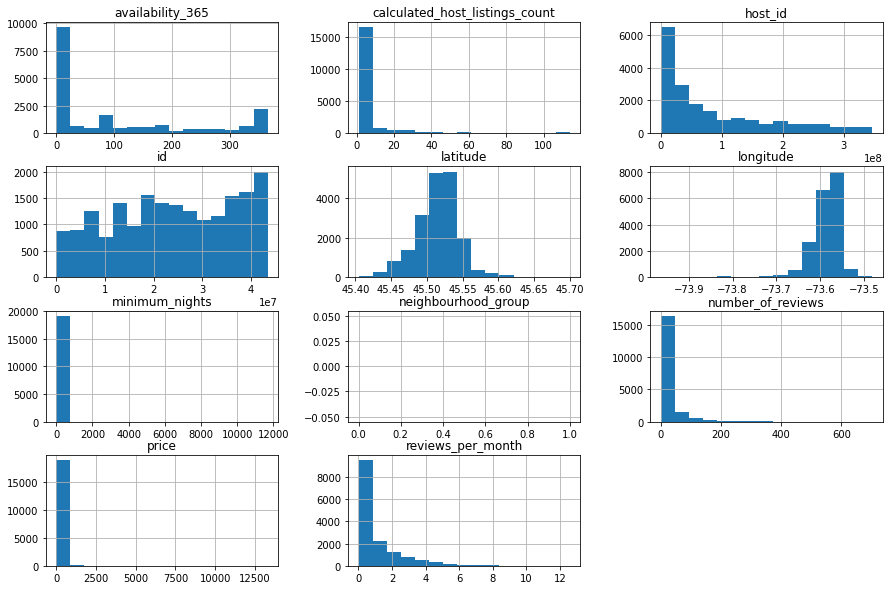

In [ ]:
# Plot histogram of the numerical variables
df.hist(bins=15, figsize=(15,10));

### Q3.1 A brief analysis of outliers

As mentioned above, by the distribution of the histogram, it is possible to verify signs of the presence of **outliers**.
Outliers are those data that will 'harm' our analysis because they will pull the distribution to the extremes of the histogram. The values ​​do not follow the distribution and distort the graphical representation. There are two quick ways to help detect outliers:
* Statistical summary using the `describe()` method
* Plot boxplots for the variable


In [ ]:
# See the statistical summary of the most relevant numerical variables
df[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19133.000000,19133.000000,19133.000000,15045.000000,19133.000000,19133.000000
mean,112.624680,11.671196,22.426854,1.103414,6.082319,102.340511
std,227.900843,91.758070,45.875224,1.483557,14.592341,130.983845
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,49.000000,1.000000,1.000000,0.150000,1.000000,0.000000
50%,78.000000,2.000000,5.000000,0.470000,1.000000,22.000000
75%,120.000000,6.000000,22.000000,1.450000,3.000000,179.000000
max,13294.000000,11684.000000,702.000000,12.580000,114.000000,365.000000


Analysis of the variables `price` and `minimun_nights` based on the statistical summary:
* **`Price` variable:** 
  * We have an average daily rate of 112.62 in Montreal, with a standard deviation of 227.90.
  * Does a minimum daily rate for R $ 10.00 make sense?
  * And a maximum daily rate for 13.294?
  * 75% of the values ​​are below 120.00.
  * The median is 78.00 (Half of the values ​​are up to 78.00)
* **`Minimum_nights` variable:** 
  * We have an average daily minimum of 11.67, with a standard deviation of 91.75. 
  * Does a minimum of 11684.00 nights (32 years old !!!) make sense? Certainly not! 
  * We can observe that 75% of the registrations are up to 6 nights.
  * By the median, we observed that the minimum number of nights for half of the accommodations is 2.

### Boxplot for `price` variable:

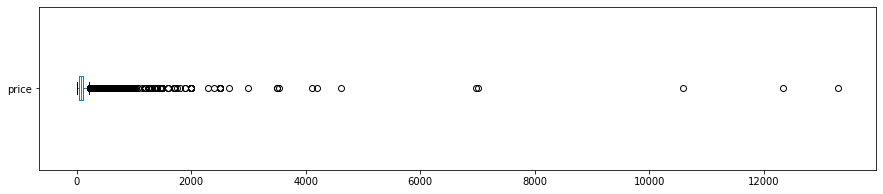

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Through the boxplot, it is possible to check the number of outliers, represented outside the standard rectangle of this type of graph. With some explorations, we can note below that only 1.53% of the data represents a daily rate above 500.00. Values ​​above 1000 represent 0.42% of the data.

In [ ]:
# See the number of values ​​above 500 for price
print("values ​​above 500 for price:")
print("{} entries".format(len(df[df.price>500])))
print("{:.4f}%".format((len(df[df.price>500])/df.shape[0])*100))

values ​​above 500 for price:
293 entries
1.5314%


In [ ]:
# See the number of values ​​above 1000 for price.
print("values ​​above 1000 for price:")
print("{} entries".format(len(df[df.price>1000])))
print("{:.4f}%".format((len(df[df.price>1000])/df.shape[0])*100))

values ​​above 1000 for price:
80 entries
0.4181%


### Boxplot for `minimum_nights`

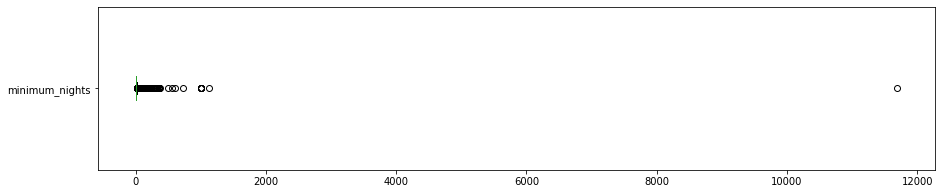

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Through the boxplot, it is possible to check the number of outliers, represented outside the standard rectangle of this type of graph. With some explorations, we can observe below that 10.81% of the data represents a minimum daily rate above 30.  The minimum daily rate above 45 daily rates represents only 2.64% of the data.


In [ ]:
# See the number of values ​​above 30 for 'minimum_nights'
print("minimum_nights: number of values ​​above 30")
print("{} entries".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))

minimum_nights: number of values ​​above 30
2069 entries
10.8138%


In [ ]:
# See the number of values ​​above 45 for 'minimum_nights'
print("minimum_nights: number of values ​​above 45")
print("{} entries".format(len(df[df.minimum_nights>45])))
print("{:.4f}%".format((len(df[df.minimum_nights>45])/df.shape[0])*100))

minimum_nights: number of values ​​above 45
505 entries
2.6394%


**Histogram without outliers**

Since we identified outliers in the variables `price` and `minimum_nights`, let's clear their data frame and plot the histogram again.

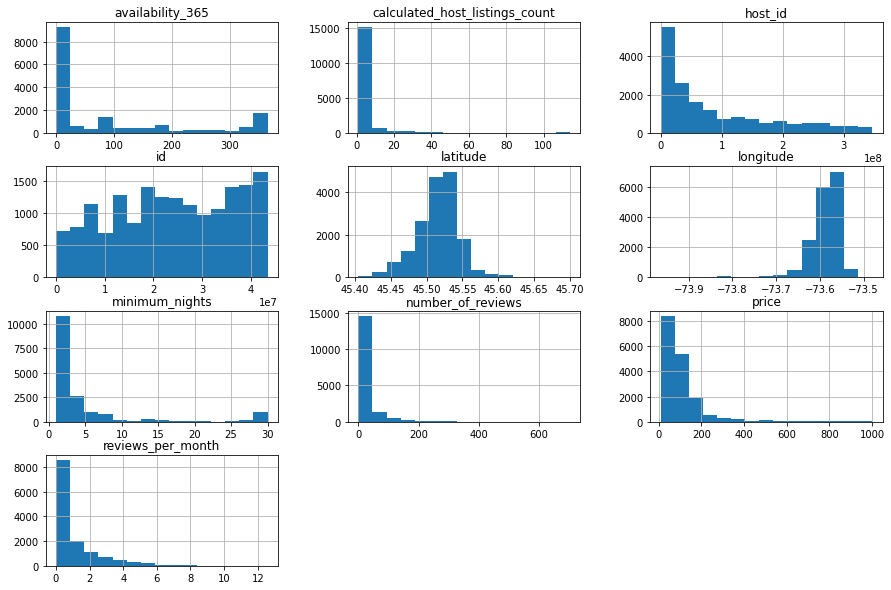

In [ ]:
# Remove *outliers* in a new dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index,axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index,axis=0, inplace=True)

# Remove 'neighbourhood_group' because it has null values
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plot the histogram for numerical variables
df_clean.hist(bins=15, figsize=(15,10));

* From the new plot of the histograms, it is possible to observe that most people usually stay for two days, perhaps the typical weekend traveler. 
* As for the price, it is already possible to observe a better distribution for price variable, with the vast majority staying up to 400.00. 
* In the analysis of the statistical summary, considering only the variables treated from the outlier's perspective, there was a significant reduction in the standard deviation, that is, how much the records are out from the average.

In [ ]:
# See statistical summary after outliers removal for 'price' and 'minimum_nights' variables.
df_clean[['price','minimum_nights']].describe()

,price,minimum_nights
count,16995.000000,16995.000000
mean,104.130156,4.631598
std,104.397601,7.293638
min,10.000000,1.000000
25%,49.000000,1.000000
50%,78.000000,2.000000
75%,120.000000,4.000000
max,1000.000000,30.000000


### **Q4. What is the average rental price?**
Considering all the inputs of the variable `price`, we have an average value of **112.62**. If we consider the average from the elimination of outliers for this variable, we have the average rental price value of **104.13**.

In [ ]:
# See average `price` (With outliers values)
print(df['price'].mean())

112.62467987247165


In [ ]:
# See average `price` (Without outliers values)
print(df_clean['price'].mean())

104.13015592821418


### **Q5. What is the correlation between the variables**
Correlation means that there is a relationship between two things. 
In our context, we are looking for a relationship or similarity between two variables. 
This relationship can be measured, and it is a function of the correlation coefficient to establish its intensity. To identify the correlations between the variables of interest, we will do:

*	Create a correlation matrix
*	Create a heatmap from this matrix, using the seaborn library.


In [ ]:
# Create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# Show the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024652,0.022752,0.047501,0.076375,0.124276
minimum_nights,-0.024652,1.000000,-0.054440,-0.096786,0.173103,0.142470
number_of_reviews,0.022752,-0.054440,1.000000,0.748078,0.081659,0.165327
reviews_per_month,0.047501,-0.096786,0.748078,1.000000,0.088741,0.181722
calculated_host_listings_count,0.076375,0.173103,0.081659,0.088741,1.000000,0.124460
availability_365,0.124276,0.142470,0.165327,0.181722,0.124460,1.000000


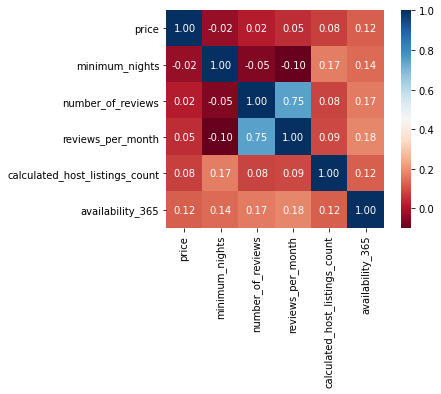

In [ ]:
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu", fmt='.2f',square=True, linecolor='white',annot=True)

It is possible to observe a moderate positive correlation between the `number_of_reviews` and `reviews_per_month` variables of 0.75. This correlation shows how much they are associated with each other, how much one influences the other, because naturally, a hosting with more reviews will have more registered reviews at the end of the month. It is important to highlight that not necessarily a correlation will indicate a cause and effect relationship.

### **Q6. What type of property is most rented on Airbnb??**
The `room_type` variable column indicates the type of rental that is advertised on Airbnb. For example, entire apartments/houses, just renting a room or even sharing a room with other people.

* •	87% of the type of accommodation is in whole apartments (61.2%) or private rooms (26.5%).
* Of the first 15 neighborhoods with the most accommodation offer, we can observe that 4 concentrates 70.1% of the accommodations in Montreal: 
  * Le Plateau-Mont-Royal(28,7%), Ville-Marie(24,8%), Rosemont-La Petite-Patrie(10.1%) and Côte-des-Neiges-Notre-Dame-de-Grâce(7,1%).

In [ ]:
# Show the number of property by type
df_clean.room_type.value_counts()

Entire home/apt    11713
Private room        5074
Shared room          146
Hotel room            62
Name: room_type, dtype: int64

In [ ]:
# Show the percentage available for each type of property
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.612188
Private room       0.265196
Shared room        0.007631
Hotel room         0.003240
Name: room_type, dtype: float64

In [ ]:
# Show the number of properties by neighborhood, classifying the first 15 properties.
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:15]

Le Plateau-Mont-Royal                   4881
Ville-Marie                             4226
Rosemont-La Petite-Patrie               1715
Côte-des-Neiges-Notre-Dame-de-Grâce     1203
Villeray-Saint-Michel-Parc-Extension    1027
Le Sud-Ouest                            1024
Mercier-Hochelaga-Maisonneuve            860
Verdun                                   418
Ahuntsic-Cartierville                    280
Outremont                                240
LaSalle                                  160
Saint-Laurent                            150
Westmount                                100
Lachine                                   89
Saint-Léonard                             76
Name: neighbourhood, dtype: int64

In [ ]:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:15] / df_clean.shape[0]

Le Plateau-Mont-Royal                   0.287202
Ville-Marie                             0.248661
Rosemont-La Petite-Patrie               0.100912
Côte-des-Neiges-Notre-Dame-de-Grâce     0.070786
Villeray-Saint-Michel-Parc-Extension    0.060430
Le Sud-Ouest                            0.060253
Mercier-Hochelaga-Maisonneuve           0.050603
Verdun                                  0.024595
Ahuntsic-Cartierville                   0.016475
Outremont                               0.014122
LaSalle                                 0.009415
Saint-Laurent                           0.008826
Westmount                               0.005884
Lachine                                 0.005237
Saint-Léonard                           0.004472
Name: neighbourhood, dtype: float64

### **Q7. What is the most expensive location in the dataset??**
One way to check one variable against another is to use `groupby()`. In this case, we want to compare neighborhoods based on the rental price. As analyzed below, the Baie-d'Urfé neighborhood is the most expensive neighborhood due to hosting ID 21688243 that has a daily rate of 423 and is raising the average cost of the region.


In [ ]:
# See average prices per neighborhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Baie-d'Urfé                      217.666667
Westmount                        156.220000
L'Île-Bizard-Sainte-Geneviève    136.388889
Montréal-Est                     134.250000
Ville-Marie                      124.311879
Outremont                        122.112500
Montréal-Ouest                   116.230769
Beaconsfield                     115.937500
Côte-Saint-Luc                   113.255319
Le Plateau-Mont-Royal            108.092194
Le Sud-Ouest                     107.674805
Mont-Royal                       107.131579
Dollard-des-Ormeaux              104.909091
Saint-Léonard                    102.552632
Lachine                           93.853933
Name: price, dtype: float64

In [ ]:
# See the number of properties in Baie-d'Urfé
print(df_clean[df_clean.neighbourhood=="Baie-d'Urfé"])

             id  ... availability_365
74       211602  ...              346
1277    4180573  ...              365
10350  25783067  ...                0

[3 rows x 15 columns]


In [ ]:
# See 3 first entries for Baie-d'Urfé
df_clean[df.neighbourhood=="Baie-d'Urfé"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
74,211602,Beautiful sun-filled Studio,407029,Hans,Baie-d'Urfé,45.41419,-73.90768,Entire home/apt,71,2,159,2019-08-20,2.00,1,346
1277,4180573,Serenity dream in Montreal Quebec......,21688243,Simin,Baie-d'Urfé,45.41190,-73.91085,Entire home/apt,423,7,0,NaN,NaN,2,365
10350,25783067,Two-bedroom studio with simple breakfast & pool,41285013,Wendy,Baie-d'Urfé,45.41361,-73.90494,Entire home/apt,159,3,39,2019-08-29,1.68,1,0


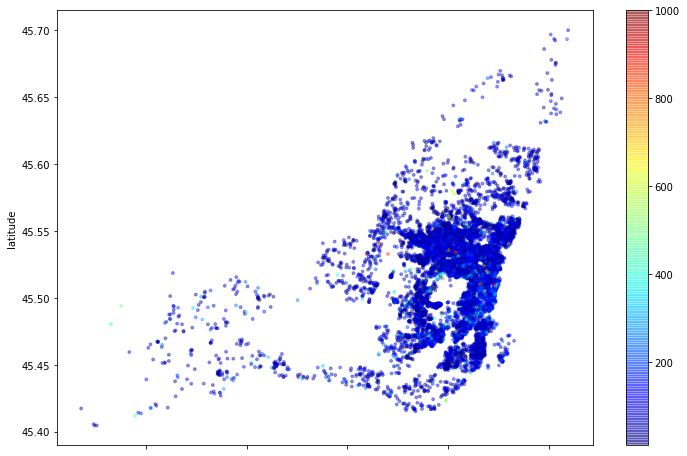

In [ ]:
# Plot properties by lat and long
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

As we can see in the Montreal map below, the accommodations are concentrated in the Central region towards the North / East of the city.

![alt text](https://2.bp.blogspot.com/-LNoX2pTDS50/UJuKaUCr-HI/AAAAAAAAnBo/-MLEI7uUt-g/s1600/Mapa_regiao_Montreal_Canada.jpg)
*Fonte da Imagem:* https://mapasblog.blogspot.com/2012/11/mapas-de-montreal-canada.html

### **Q8. What is the average minimum rental night (minimum_nights)??**
Considering the data with the variable outliers, the average of `minimum_nights` is 11.6 daily. However, after disregarding outliers, there is a significant drop in this minimum to 4.6 daily.

In [ ]:
# See average for `minimum_nights` variable (With outliers)
print(df['minimum_nights'].mean())

11.671196362305963


In [ ]:
# See average for `minimum_nights` variable (Without outliers)
print(df_clean['minimum_nights'].mean())

4.631597528684908


## Conclusions


We realize a superficial exploratory analysis with the Airbnb database, however it is possible to observe the existence of outliers in some of the variables that impact analysis of the dataset. Therefore, each must be analyzed in detail so that the final analysis on the set is not compromised. In the example above, I used the variables `price` and `minimum_nights` to illustrate the importance of exploration for knowledge of the data.

Additionally, it was observed that in some locations there are few properties available, which can distort the statistical information of some attributes such as 'price' in the Baie-d'Urfé Neighbourhood, pointed out as the most expensive neighbourhood but with only 3 accommodations being one in 423 when the other 2 accommodations charge 71 and 159.

Another interesting analysis is the plotting on the price distribution map with a visualization of the city map to observe the geographical distribution of the accommodations.

Finally, remember that this dataset is a short version, ideal only for an initial approach. It is recommended that the complete data set with 106 available attributes be used in a further exploratory analysis.